In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<h1>Load and Prep dataset</h1>

In [5]:
data = pd.read_csv('dataset.csv')
data.head()

,Date,Symbol,Open,High,Low,Close,Volume,log_volume,Momentum_2Wk
0,2009-04-06 04:00:00,A,11.67,11.67,11.26,11.43,4691592,15.361283,2.36
1,2009-04-14 04:00:00,A,11.92,12.00,11.73,11.82,3114079,14.951444,2.92
2,2009-04-21 04:00:00,A,11.80,12.04,11.67,11.87,4251390,15.262757,2.03
3,2009-04-28 04:00:00,A,11.96,12.37,11.77,12.19,4939050,15.412684,0.82
4,2009-05-05 04:00:00,A,13.85,13.88,13.28,13.40,4895647,15.403857,2.39


In [6]:
# Copy the data and sort by symbol and date
df = data
df = data.copy().sort_values(by=["Symbol", "Date"])
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", drop=True, inplace=True)
df.head()

,Symbol,Open,High,Low,Close,Volume,log_volume,Momentum_2Wk
Date,,,,,,,,
2009-04-06 04:00:00,A,11.67,11.67,11.26,11.43,4691592,15.361283,2.36
2009-04-14 04:00:00,A,11.92,12.00,11.73,11.82,3114079,14.951444,2.92
2009-04-21 04:00:00,A,11.80,12.04,11.67,11.87,4251390,15.262757,2.03
2009-04-28 04:00:00,A,11.96,12.37,11.77,12.19,4939050,15.412684,0.82
2009-05-05 04:00:00,A,13.85,13.88,13.28,13.40,4895647,15.403857,2.39


In [7]:
# Group by symbol and describe the data
stats_by_stock:pd.DataFrame = df.groupby("Symbol").describe()
stats_by_stock.head()
# Uncomment to save the stats to a file
# stats_by_stock.to_excel("./stats_by_stock.xlsx")

C:\Users\bmcne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\bmcne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Open                                                             
        count       mean        std    min    25%    50%    75%     max   
Symbol                                                                    
A       549.0  42.670783  18.428922  11.67  28.89  39.43  59.23   89.97  \
AAON    549.0  22.137778  13.392906   5.52   9.02  20.60  33.45   56.70   
AAPL    549.0  26.770510  15.721889   4.11  14.47  23.97  36.69   79.07   
AB      549.0  23.853898   4.922727  11.92  21.61  24.30  27.45   34.76   
ABC     549.0  65.486612  26.902550  16.25  38.42  75.00  87.37  115.62   

         High                                                             
        count       mean        std    min    25%    50%    75%     max   
Symbol                                                                    
A       549.0  43.080291  18.536023  11.67  29.32  39.58  59.72   90.28  \
AAON    549.0  22.443060  13.544826   5.91   9.10  20.80  34.10   57.26   
AAPL    549.0  27.017304  15.877974   4.24  14.57  24.19  37.07   80.39   
AB      549.0  24.161384   4.945973  11.97  21.89  24.60  27.70   35.61   
ABC     549.0  66.143497  27.160504  16.61  38.90  75.45  88.10  115.75   

          Low                                                             
        count       mean        std    min    25%    50%    75%     max   
Symbol                                                                    
A       549.0  42.268998  18.286247  11.26  28.40  39.03  59.04   89.20  \
AAON    549.0  21.834226  13.234219   5.36   8.83  20.28  33.05   55.66   
AAPL    549.0  26.541202  15.615109   4.05  14.30  23.72  36.34   78.75   
AB      549.0  23.534408   4.894776  11.74  21.20  24.00  26.91   34.57   
ABC     549.0  64.845282  26.620023  16.18  38.19  73.73  86.54  114.40   

        Close                                                             
        count       mean        std    min    25%    50%    75%     max   
Symbol                                                                    
A       549.0  42.700091  18.401620  11.43  28.58  39.34  59.13   90.12  \
AAON    549.0  22.147851  13.373923   5.41   8.99  20.47  33.90   55.74   
AAPL    549.0  26.789162  15.757701   4.23  14.47  24.01  36.58   80.39   
AB      549.0  23.841111   4.928274  11.81  21.52  24.28  27.37   35.34   
ABC     549.0  65.500055  26.874206  16.40  38.69  74.59  87.38  115.11   

       Volume                                                        
        count          mean           std         min          25%   
Symbol                                                               
A       549.0  3.403598e+06  1.952184e+06    649078.0    1919771.0  \
AAON    549.0  1.658021e+05  9.280970e+04         0.0     102329.0   
AAPL    549.0  3.111771e+08  2.332832e+08  45903688.0  127727776.0   
AB      549.0  3.589377e+05  2.350330e+05     98947.0     212542.0   
ABC     549.0  2.250123e+06  1.285222e+06    487220.0    1399772.0   

                                               log_volume              
                50%          75%           max      count       mean   
Symbol                                                                 
A         2933295.0    4468486.0  1.325393e+07      549.0  14.888074  \
AAON       140299.0     197281.0  6.303330e+05      549.0       -inf   
AAPL    237467656.0  435295700.0  1.880987e+09      549.0  19.297390   
AB         296098.0     432736.0  2.312643e+06      549.0  12.639256   
ABC       1944692.0    2825868.0  9.725753e+06      549.0  14.491123   

                                                                          
             std        min        25%        50%        75%        max   
Symbol                                                                    
A       0.556143  13.383308  14.467716  14.891637  15.312560  16.399805  \
AAON         NaN       -inf  11.535948  11.851531  12.192384  13.354004   
AAPL    0.726651  17.642056  18.665412  19.285542  19.891536  21.355062   
AB      0.528870 

In [8]:
# Select valid symbols
upper_bound = stats_by_stock["Open"]["max"] < 500
lower_bound = stats_by_stock["Open"]["min"] > 1
outliers_removed = stats_by_stock[upper_bound & lower_bound]
valid_symbols = outliers_removed.index.to_list()

# Remove outliers from the data
mask = df["Symbol"].isin(valid_symbols)
df = df[mask]
print(df.shape)
df.head()

(948672, 8)


,Symbol,Open,High,Low,Close,Volume,log_volume,Momentum_2Wk
Date,,,,,,,,
2009-04-06 04:00:00,A,11.67,11.67,11.26,11.43,4691592,15.361283,2.36
2009-04-14 04:00:00,A,11.92,12.00,11.73,11.82,3114079,14.951444,2.92
2009-04-21 04:00:00,A,11.80,12.04,11.67,11.87,4251390,15.262757,2.03
2009-04-28 04:00:00,A,11.96,12.37,11.77,12.19,4939050,15.412684,0.82
2009-05-05 04:00:00,A,13.85,13.88,13.28,13.40,4895647,15.403857,2.39


Symbol
AAPL     Axes(0.125,0.2;0.775x0.68)
ADBE     Axes(0.125,0.2;0.775x0.68)
AMD      Axes(0.125,0.2;0.775x0.68)
AMZN     Axes(0.125,0.2;0.775x0.68)
GOOGL    Axes(0.125,0.2;0.775x0.68)
INTC     Axes(0.125,0.2;0.775x0.68)
MSFT     Axes(0.125,0.2;0.775x0.68)
NFLX     Axes(0.125,0.2;0.775x0.68)
NVDA     Axes(0.125,0.2;0.775x0.68)
T        Axes(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

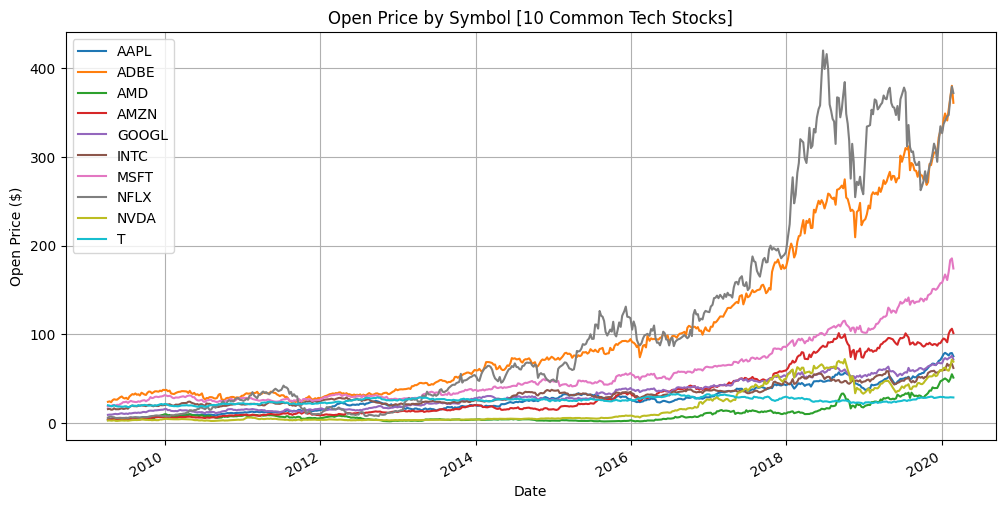

In [9]:
# Plot the open price by symbol for all stocks
# df.groupby("Symbol")["Open"].plot(figsize=(20, 10), legend=False, title="Open Price by Symbol [All Stocks]")
# Plot the open price by symbol for 10 tech stocks
select_stocks = ["AAPL", "ADBE", "AMD", "AMZN", "GOOGL", "INTC", "MSFT", "NVDA", "NFLX", "T"]
df[df["Symbol"].isin(select_stocks)].groupby("Symbol")["Open"].plot(figsize=(12, 6), legend=True, title="Open Price by Symbol [10 Common Tech Stocks]", ylabel="Open Price ($)", grid=True)

In [10]:
df[df["Symbol"].isin(select_stocks)].groupby("Symbol").head(10)

,Symbol,Open,High,Low,Close,Volume,log_volume,Momentum_2Wk
Date,,,,,,,,
2009-04-06 04:00:00,AAPL,4.11,4.24,4.05,4.23,658062480,20.304810,1.09
2009-04-14 04:00:00,AAPL,4.27,4.29,4.19,4.23,454755700,19.935271,1.26
2009-04-21 04:00:00,AAPL,4.25,4.36,4.24,4.35,470684032,19.969698,0.94
2009-04-28 04:00:00,AAPL,4.41,4.51,4.40,4.43,455856632,19.937689,0.59
2009-05-05 04:00:00,AAPL,4.71,4.74,4.68,4.74,398401248,19.802970,1.01
2009-05-12 04:00:00,AAPL,4.63,4.63,4.40,4.44,609479240,20.228115,0.21
2009-05-19 04:00:00,AAPL,4.53,4.62,4.49,4.55,372422036,19.735538,0.32
2009-05-27 04:00:00,AAPL,4.71,4.82,4.68,4.75,646962680,20.287799,0.40
2009-06-03 04:00:00,AAPL,5.00,5.04,4.97,5.03,565198360,20.152687,0.60


<h1>Feature Engineering</h1>

In [11]:
#Adding Log Volume, as suggested on this site:https://alphascientist.com/feature_engineering.html
from pandas.tseries.frequencies import to_offset

df['log_volume'] = df['Volume'].apply(np.log)

df = df.resample('W').first()

df.tail()

,Symbol,Open,High,Low,Close,Volume,log_volume,Momentum_2Wk
Date,,,,,,,,
2020-02-02,A,86.54,87.17,86.21,86.56,1867959.0,14.440357,3.13
2020-02-09,A,83.29,83.69,82.11,82.15,1919771.0,14.467716,-3.30
2020-02-16,A,83.04,84.64,82.92,84.43,2066861.0,14.541542,-0.14
2020-02-23,A,85.66,86.08,84.53,84.79,2873640.0,14.871090,-2.80
2020-03-01,A,80.70,80.88,77.69,77.95,2767995.0,14.833634,-12.17


In [12]:
#Introduce a common financial statistic, 10 or 30 day momentum
#shift pulls the close for a stock 10 days prior
df['Momentum_2Wk'] = df['Close'] - df['Close'].shift(2)
df.tail()

,Symbol,Open,High,Low,Close,Volume,log_volume,Momentum_2Wk
Date,,,,,,,,
2020-02-02,A,86.54,87.17,86.21,86.56,1867959.0,14.440357,-3.56
2020-02-09,A,83.29,83.69,82.11,82.15,1919771.0,14.467716,NaN
2020-02-16,A,83.04,84.64,82.92,84.43,2066861.0,14.541542,-2.13
2020-02-23,A,85.66,86.08,84.53,84.79,2873640.0,14.871090,2.64
2020-03-01,A,80.70,80.88,77.69,77.95,2767995.0,14.833634,-6.48


In [13]:
df['Momentum_5Wk'] = df['Close'] - df['Close'].shift(5)
df.tail()

,Symbol,Open,High,Low,Close,Volume,log_volume,Momentum_2Wk,Momentum_5Wk
Date,,,,,,,,,
2020-02-02,A,86.54,87.17,86.21,86.56,1867959.0,14.440357,-3.56,1.11
2020-02-09,A,83.29,83.69,82.11,82.15,1919771.0,14.467716,NaN,-2.42
2020-02-16,A,83.04,84.64,82.92,84.43,2066861.0,14.541542,-2.13,-3.16
2020-02-23,A,85.66,86.08,84.53,84.79,2873640.0,14.871090,2.64,-5.33
2020-03-01,A,80.70,80.88,77.69,77.95,2767995.0,14.833634,-6.48,NaN


In [14]:
#Removing the first month of data for each symbol that would only have zeroes for 30 day momentum
df_grouped = df.groupby('Symbol')

df = df_grouped.apply(lambda x: x.iloc[30:])

df.reset_index(level=0, drop=True, inplace=True)

df.head()

,Symbol,Open,High,Low,Close,Volume,log_volume,Momentum_2Wk,Momentum_5Wk
Date,,,,,,,,,
2009-11-08,A,18.94,18.94,18.56,18.72,3415930.0,15.043960,-0.02,-0.10
2009-11-15,A,20.01,20.67,19.85,20.46,8756124.0,15.985264,2.76,0.81
2009-11-22,A,20.70,20.78,20.51,20.68,2765210.0,14.832627,1.96,1.22
2009-12-06,A,20.59,20.71,20.43,20.69,3572043.0,15.088648,0.01,2.99
2009-12-13,A,21.23,21.45,21.22,21.37,4039558.0,15.211646,NaN,2.65


In [15]:
def clean_dataset(df):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [22]:
#Listing the variance in open price explained by each feature we have, using SKLearn

features = df.drop(['Symbol', 'High','Low','Open'], axis = 1)
features = clean_dataset(features)
missing = set(df.columns) - set(features.columns)
new_df = df[list(missing)]
target = new_df['Open']
# features = features.iloc[::5, :]
print(target.shape)
print(features.shape)
# features = pd.read_csv('dataset.csv')
# target = features['Open']
features.tail(10)

(479,)
(479, 5)


,Close,Volume,log_volume,Momentum_2Wk,Momentum_5Wk
Date,,,,,
2019-12-08,80.93,1690909.0,14.340777,1.64,4.76
2019-12-15,83.42,1718397.0,14.356902,2.47,7.87
2019-12-22,83.43,2025494.0,14.521324,2.50,6.38
2019-12-29,85.45,649078.0,13.383308,2.03,6.16
2020-01-05,84.57,1118322.0,13.927340,1.14,3.62
2020-01-12,87.59,1417028.0,14.164072,2.14,6.66
2020-01-19,90.12,3718336.0,15.128787,5.55,6.70
2020-02-02,86.56,1867959.0,14.440357,-3.56,1.11
2020-02-16,84.43,2066861.0,14.541542,-2.13,-3.16


In [ ]:
df[df["Symbol"].isin(select_stocks)].groupby("Symbol")
df.isin()

In [23]:
# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(features)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Suppose 'Open' is what we want to predict

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(principalComponents, target, test_size=0.2, random_state=42)

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# We could also use mean squared error for loss calculation
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', round(mse, 2))


Mean Absolute Error: 1.39 degrees.
Mean Squared Error: 3.76


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [43]:

gnb = GaussianNB()

y_pred =gnb.fit(X_train, y_train.astype(int)).predict(X_test)
# mean_squared_error(y_test, predictions)
print(accuracy_score(y_test.astype(int), y_pred))

0.020833333333333332


In [28]:
from timeit import Timer

t = Timer(lambda: rf.fit(X_train, y_train))
train_time = t.timeit(number=10) / 10

print("Average training time: ", train_time)

Average training time:  3.9243761399993673


In [29]:
import matplotlib.pyplot as plt

# Plot predicted vs actual
# plt.scatter(y_test, predictions)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs Predicted")


In [30]:

# Plot residuals 
residuals = y_test - predictions
# plt.hist(residuals, bins=25)
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.title("Residual Distribution")

In [31]:
# Summary metrics
print("MAE:", round(np.mean(errors), 2)) 
print("MSE:", mean_squared_error(y_test, predictions))

# Plot feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features.columns[i] for i in indices])
# plt.title("Feature Importance")
# print(importances)

MAE: 1.39
MSE: 3.763294978340728


<Axes: xlabel='Open'>

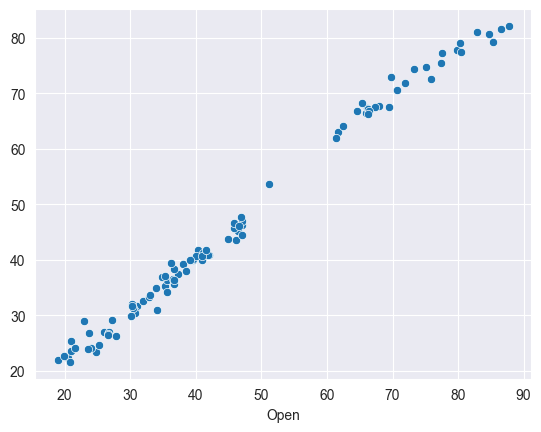

In [32]:
import seaborn as sns
import plotly.express as px

# Use seaborn styling 
sns.set_style('darkgrid') 

# Scatter plot with seaborn
sns.scatterplot(x=y_test, y=predictions)


C:\Users\bmcne\AppData\Local\Temp\ipykernel_3320\466109762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=25, kde=True)


Text(0, 0.5, 'Density')

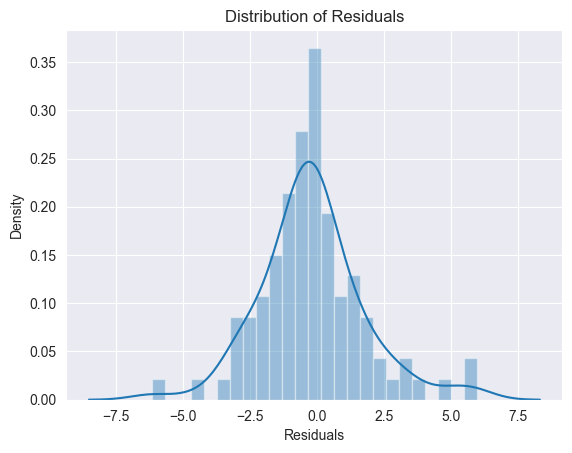

In [33]:

sns.distplot(residuals, bins=25, kde=True)

# Add plot title
plt.title("Distribution of Residuals")

# Label axes
plt.xlabel("Residuals")  
plt.ylabel("Density")

In [34]:

# Feature importance horizontal bar chart
feature_names = [features.columns[i] for i in indices]
labels={'y': feature_names}
fig = px.bar(x=importances, y=feature_names, orientation='h',
             title='Feature Importance')
fig.update_layout(yaxis_title="Features")
fig.show()


In [35]:

# Use plotly express for actual vs predicted
fig = px.scatter(x=y_test, y=predictions, trendline='ols')
fig.update_layout(title='Open Actual vs Predicted', 
                   xaxis_title='Actual Values',
                   yaxis_title='Predicted Values')
fig.show()

In [36]:
#sklearn imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [37]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
scaler = StandardScaler()

features_std = scaler.fit_transform(features)

feature_pca = PCA(n_components=4) 
feature_pca.fit(features)

print(feature_pca.explained_variance_ratio_)

[1.00000000e+00 6.10097582e-11 2.92144044e-12 5.67476269e-13]


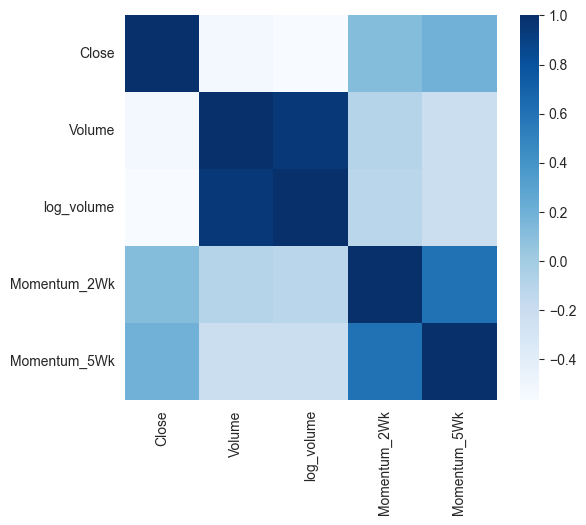

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = features.corr()

#corr matrix with heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=False, cmap=plt.cm.Blues)
plt.savefig('feature_correlations.png')

1
2
0.10725523000000976
3.9243761399993673
0.10725523000000976


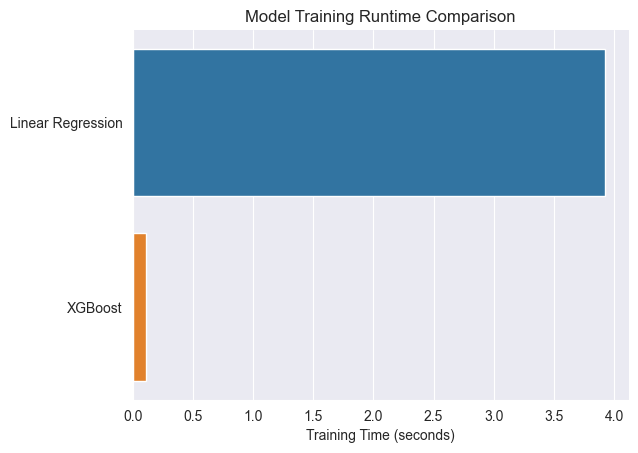

In [39]:
 from XGBoost import *

xgb_predictions = run_xgboost(X_train, X_test, y_train)
print(train_time)
print(xgb_predictions)

sns.barplot(x=[train_time, xgb_predictions], y=['Linear Regression', 'XGBoost'])

plt.xlabel('Training Time (seconds)')

plt.title('Model Training Runtime Comparison')

sns.despine()